<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Step 1: Load the dataset
dataset = pd.read_csv('/content/drive/My Drive/telematics_syn.csv')

# Step 2: Create the adjusted ClaimYN label
# ClaimYN = 1 if NB_Claim >= 1 and AMT_Claim > 1000, else 0
dataset['ClaimYN'] = ((dataset['NB_Claim'] >= 1) & (dataset['AMT_Claim'] > 1000)).astype(int)

# Step 3: Display the distribution of the new labels
label_distribution = dataset['ClaimYN'].value_counts().sort_index()
label_mapping = {0: 'Not Risky', 1: 'Risky'}
print("\nAdjusted Distribution of ClaimYN Labels:")
for label, count in label_distribution.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")

# Step 4: Save the updated dataset with the new labels
dataset.to_csv('telematics_syn_with_Adjusted_ClaimYN.csv', index=False)


Adjusted Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 2698 instances


In [4]:
df = pd.read_csv('telematics_syn_with_Adjusted_ClaimYN.csv')
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,ClaimYN
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753,1
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840,0
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000,0


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 4: Preprocess the dataset
# 1. Handle missing values (if any)
dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values

# 2. Encode categorical variables (if any exist)
# Assuming 'CategoryColumn' is a placeholder for actual categorical columns in your dataset
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# 3. Standardize numerical columns
# Assuming all columns except 'ClaimYN' and the original claims columns are numerical
numerical_columns = dataset.drop(columns=['ClaimYN', 'NB_Claim', 'AMT_Claim']).columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

<ipython-input-5-510080e7c0ff>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values


In [6]:
print(numerical_columns)

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [7]:
print(categorical_columns)

Index(['Insured.sex', 'Marital', 'Car.use', 'Region'], dtype='object')


In [8]:
from imblearn.over_sampling import SMOTE

# Step 5: Handle the imbalance in the dataset
X = dataset.drop(columns=['ClaimYN'])
y = dataset['ClaimYN']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merging resampled data back into a single DataFrame
dataset_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the new distribution of ClaimYN after resampling
label_distribution_resampled = dataset_resampled['ClaimYN'].value_counts().sort_index()
print("\nResampled Distribution of ClaimYN Labels:")
for label, count in label_distribution_resampled.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")


Resampled Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 97302 instances


In [9]:
# Step 6: Drop NB_Claim and AMT_Claim columns
dataset_resampled = dataset_resampled.drop(columns=['NB_Claim', 'AMT_Claim'])

In [10]:
from sklearn.model_selection import train_test_split

# Step 7: Split the dataset into train, test, and validation sets
X = dataset_resampled.drop(columns=['ClaimYN'])
y = dataset_resampled['ClaimYN']

# Split the data (70% train, 15% test, 15% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 136222
Testing set size: 29191
Validation set size: 29191


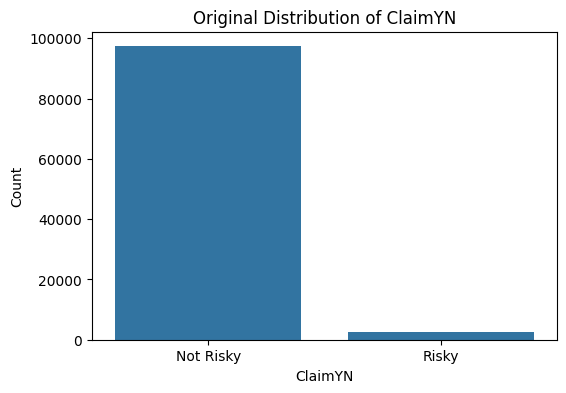

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original distribution of ClaimYN
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset['ClaimYN'])
plt.title('Original Distribution of ClaimYN')
plt.xlabel('ClaimYN')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Risky', 'Risky'])
plt.show()

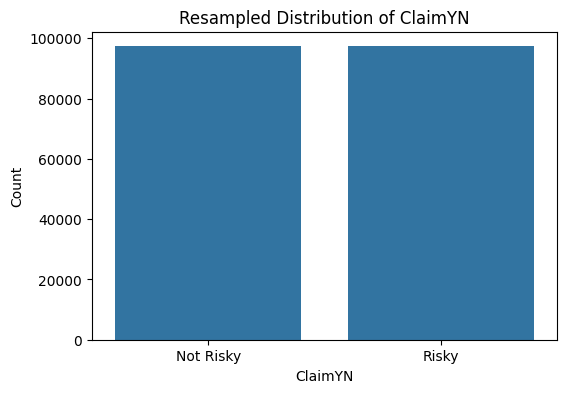

In [ ]:
# Visualize the new distribution of ClaimYN after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Resampled Distribution of ClaimYN')
plt.xlabel('ClaimYN')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Risky', 'Risky'])
plt.show()

In [ ]:
# Visualize pairwise relationships
sns.pairplot(dataset_resampled.sample(500), hue='ClaimYN', diag_kind='kde')
plt.suptitle('Pairwise Relationships in Resampled Data', y=1.02)
plt.show()

In [11]:
!pip install xlstm torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
!pip install pytorch_tabnet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [16]:
import xlstm
print(dir(xlstm))

['FeedForwardConfig', 'GatedFeedForward', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'blocks', 'components', 'mLSTMBlock', 'mLSTMBlockConfig', 'mLSTMLayer', 'mLSTMLayerConfig', 'sLSTMBlock', 'sLSTMBlockConfig', 'sLSTMLayer', 'sLSTMLayerConfig', 'utils', 'xLSTMBlockStack', 'xLSTMBlockStackConfig', 'xLSTMLMModel', 'xLSTMLMModelConfig', 'xlstm_block_stack', 'xlstm_lm_model']


In [18]:
from xlstm import xlstm_lm_model

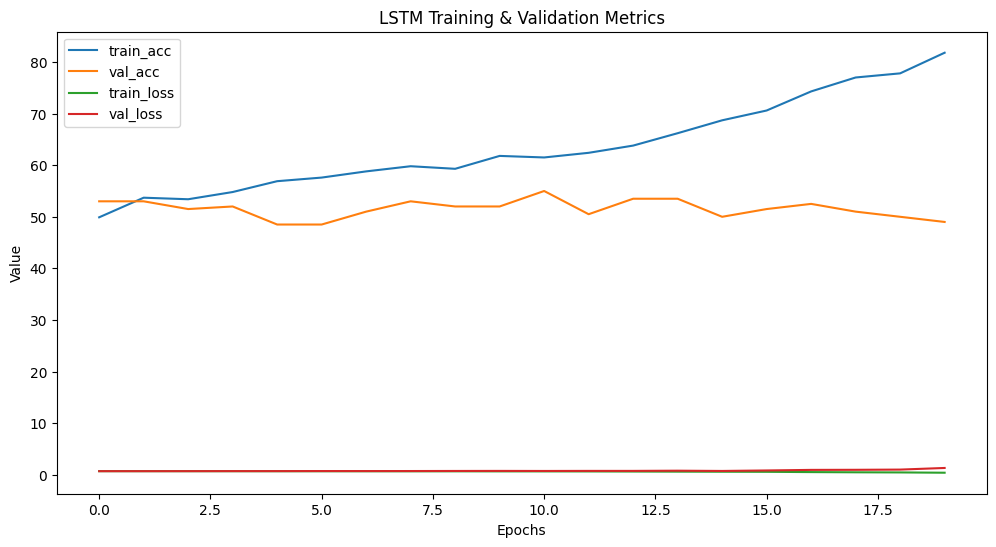

Test Accuracy - LSTM: 0.50


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the LSTM-based Classifier
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.fc(h_n[-1])
        return x

# Initialize the model, loss function, and optimizer
input_size = 10  # This should be set to the number of features in your input data
hidden_size = 128
num_layers = 2
num_classes = 2

lstm_model = LSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Assume X_train, y_train, X_val, y_val, X_test, y_test are already defined
# Convert data to PyTorch tensors
X_train_tensor = torch.randn(1000, 10, input_size)  # Example data, replace with your actual data
y_train_tensor = torch.randint(0, 2, (1000,))
X_val_tensor = torch.randn(200, 10, input_size)
y_val_tensor = torch.randint(0, 2, (200,))
X_test_tensor = torch.randn(100, 10, input_size)
y_test_tensor = torch.randint(0, 2, (100,))

# Prepare data loaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Training loop
train_acc, val_acc = [], []
train_loss, val_loss = [], []

epochs = 20

for epoch in range(epochs):
    lstm_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc.append(100 * correct / total)
    train_loss.append(running_loss / len(train_loader))

    # Validation
    lstm_model.eval()
    val_loss_total, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = lstm_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss_total += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc.append(100 * correct / total)
    val_loss.append(val_loss_total / len(val_loader))

# Plot training and validation accuracy/loss
def plot_metrics(metrics, title):
    plt.figure(figsize=(12, 6))
    for metric_name, values in metrics.items():
        plt.plot(values, label=metric_name)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_metrics({'train_acc': train_acc, 'val_acc': val_acc, 'train_loss': train_loss, 'val_loss': val_loss}, title="LSTM Training & Validation Metrics")

# Test Accuracy
lstm_model.eval()
with torch.no_grad():
    lstm_test_outputs = lstm_model(X_test_tensor)
    _, lstm_test_preds = torch.max(lstm_test_outputs.data, 1)
    test_acc_lstm = accuracy_score(y_test_tensor.numpy(), lstm_test_preds.numpy())

print(f"Test Accuracy - LSTM: {test_acc_lstm:.2f}")

Epoch [1/100], Train Loss: 0.6945, Train Acc: 50.50%, Val Loss: 0.6917, Val Acc: 53.50%
Epoch [2/100], Train Loss: 0.6934, Train Acc: 51.70%, Val Loss: 0.6941, Val Acc: 44.50%
Epoch [3/100], Train Loss: 0.6935, Train Acc: 50.10%, Val Loss: 0.6921, Val Acc: 53.50%
Epoch [4/100], Train Loss: 0.6930, Train Acc: 50.80%, Val Loss: 0.6957, Val Acc: 48.50%
Epoch [5/100], Train Loss: 0.6945, Train Acc: 50.80%, Val Loss: 0.6916, Val Acc: 53.50%
Epoch [6/100], Train Loss: 0.6923, Train Acc: 53.00%, Val Loss: 0.6949, Val Acc: 55.50%
Epoch [7/100], Train Loss: 0.6899, Train Acc: 53.10%, Val Loss: 0.7004, Val Acc: 48.50%
Epoch [8/100], Train Loss: 0.6915, Train Acc: 50.50%, Val Loss: 0.6992, Val Acc: 51.50%
Epoch [9/100], Train Loss: 0.6945, Train Acc: 52.30%, Val Loss: 0.6965, Val Acc: 46.50%
Epoch [10/100], Train Loss: 0.6899, Train Acc: 54.00%, Val Loss: 0.7018, Val Acc: 55.00%
Epoch [11/100], Train Loss: 0.6846, Train Acc: 54.20%, Val Loss: 0.7062, Val Acc: 46.00%
Epoch [12/100], Train Loss: 0.

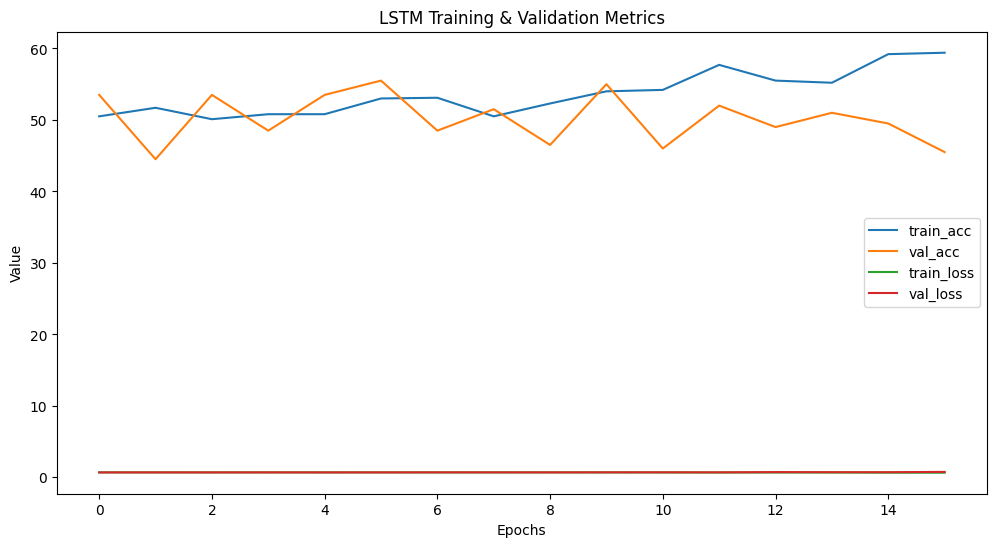

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.dropout(h_n[-1])
        x = self.fc(x)
        return x

# Hyperparameters
input_size = 10
hidden_size = 256  # Increased from 128
num_layers = 3  # Increased from 2
num_classes = 2
dropout_rate = 0.5
learning_rate = 0.001
batch_size = 32  # Decreased from 64
epochs = 100  # Increased from 20

lstm_model = LSTMModel(input_size, hidden_size, num_layers, num_classes, dropout_rate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=learning_rate, weight_decay=1e-5)  # Added weight decay

# Assume X_train, y_train, X_val, y_val, X_test, y_test are already defined
# For demonstration, we'll use random data. Replace with your actual data.
X_train_tensor = torch.randn(1000, 10, input_size)
y_train_tensor = torch.randint(0, 2, (1000,))
X_val_tensor = torch.randn(200, 10, input_size)
y_val_tensor = torch.randint(0, 2, (200,))
X_test_tensor = torch.randn(100, 10, input_size)
y_test_tensor = torch.randint(0, 2, (100,))

train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Training loop with early stopping
train_acc, val_acc = [], []
train_loss, val_loss = [], []
best_val_acc = 0
patience = 10
no_improve = 0

for epoch in range(epochs):
    lstm_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc.append(100 * correct / total)
    train_loss.append(running_loss / len(train_loader))

    # Validation
    lstm_model.eval()
    val_loss_total, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = lstm_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss_total += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_accuracy = 100 * correct / total
    val_acc.append(val_accuracy)
    val_loss.append(val_loss_total / len(val_loader))

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.2f}%')

    # Early stopping
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(lstm_model.state_dict(), 'best_model.pth')
        no_improve = 0
    else:
        no_improve += 1
        if no_improve == patience:
            print("Early stopping triggered")
            break

# Load best model for testing
lstm_model.load_state_dict(torch.load('best_model.pth'))

# Test Accuracy
lstm_model.eval()
with torch.no_grad():
    lstm_test_outputs = lstm_model(X_test_tensor)
    _, lstm_test_preds = torch.max(lstm_test_outputs.data, 1)
    test_acc_lstm = accuracy_score(y_test_tensor.numpy(), lstm_test_preds.numpy())

print(f"Test Accuracy - LSTM: {test_acc_lstm:.2f}")

# Plot training and validation accuracy/loss
def plot_metrics(metrics, title):
    plt.figure(figsize=(12, 6))
    for metric_name, values in metrics.items():
        plt.plot(values, label=metric_name)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_metrics({'train_acc': train_acc, 'val_acc': val_acc, 'train_loss': train_loss, 'val_loss': val_loss}, title="LSTM Training & Validation Metrics")

In [40]:
!pip install --upgrade xlstm # Update xlstm to the latest version

Logistic Regression - Training Accuracy: 0.7613, Validation Accuracy: 0.7629
Random Forest - Training Accuracy: 1.0000, Validation Accuracy: 0.9906
Epoch [1/20], Train Loss: 0.3375, Train Acc: 84.81%, Val Loss: 0.2218, Val Acc: 90.38%
Epoch [2/20], Train Loss: 0.1847, Train Acc: 92.12%, Val Loss: 0.1698, Val Acc: 92.76%
Epoch [3/20], Train Loss: 0.1496, Train Acc: 93.69%, Val Loss: 0.1475, Val Acc: 93.84%
Epoch [4/20], Train Loss: 0.1295, Train Acc: 94.61%, Val Loss: 0.1402, Val Acc: 94.34%
Epoch [5/20], Train Loss: 0.1163, Train Acc: 95.19%, Val Loss: 0.1247, Val Acc: 95.02%
Epoch [6/20], Train Loss: 0.1060, Train Acc: 95.67%, Val Loss: 0.1182, Val Acc: 95.40%
Epoch [7/20], Train Loss: 0.0978, Train Acc: 96.02%, Val Loss: 0.1124, Val Acc: 95.60%
Epoch [8/20], Train Loss: 0.0902, Train Acc: 96.39%, Val Loss: 0.1019, Val Acc: 96.00%
Epoch [9/20], Train Loss: 0.0838, Train Acc: 96.67%, Val Loss: 0.0987, Val Acc: 96.24%
Epoch [10/20], Train Loss: 0.0787, Train Acc: 96.85%, Val Loss: 0.095

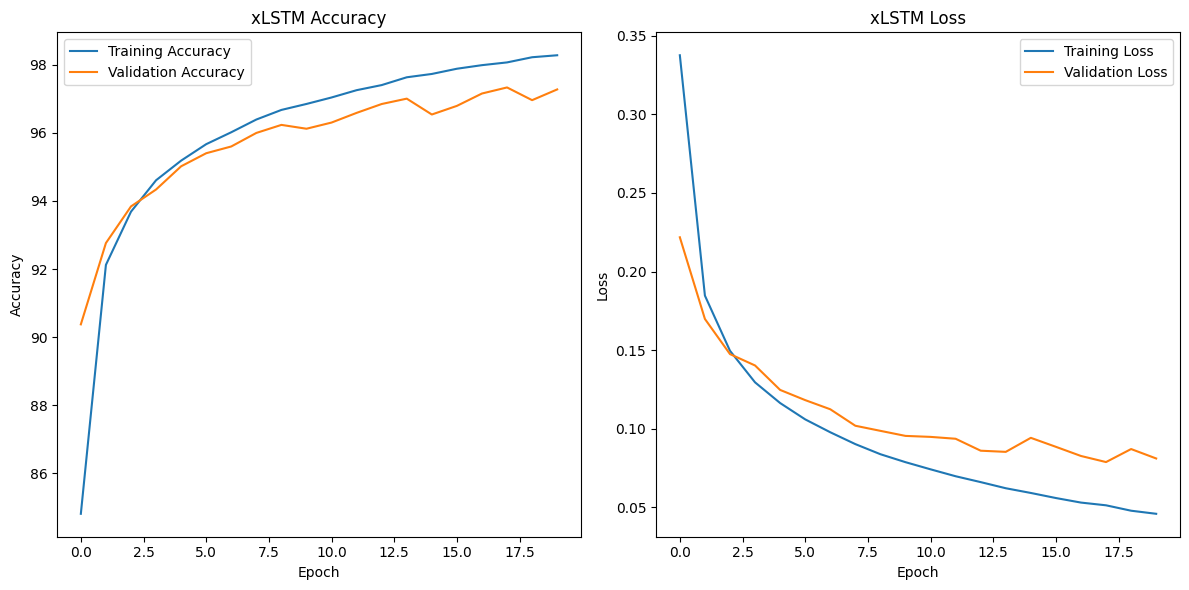

Test Accuracy - Logistic Regression: 0.7613
Test Accuracy - Random Forest: 0.9912
Test Accuracy - xLSTM: 0.9742


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# xLSTM implementation
class xLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(xLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, 5 * hidden_size)
        self.h2h = nn.Linear(hidden_size, 5 * hidden_size)

    def forward(self, x, hidden):
        h, c = hidden

        x = x.view(-1, x.size(1))

        i2h = self.i2h(torch.cat((x, h), dim=1))
        h2h = self.h2h(h)

        gates = i2h + h2h

        input_gate, forget_gate, cell_gate, output_gate, global_gate = gates.chunk(5, 1)

        input_gate = torch.sigmoid(input_gate)
        forget_gate = torch.sigmoid(forget_gate)
        cell_gate = torch.tanh(cell_gate)
        output_gate = torch.sigmoid(output_gate)
        global_gate = torch.sigmoid(global_gate)

        c_tilde = forget_gate * c + input_gate * cell_gate
        c_new = global_gate * torch.tanh(c_tilde) + (1 - global_gate) * c
        h_new = output_gate * torch.tanh(c_new)

        return h_new, c_new

class xLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(xLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.cells = nn.ModuleList([xLSTMCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]
        c = [torch.zeros(batch_size, self.hidden_size).to(x.device) for _ in range(self.num_layers)]

        for t in range(x.size(1)):
            for l in range(self.num_layers):
                if l == 0:
                    h[l], c[l] = self.cells[l](x[:, t, :], (h[l], c[l]))
                else:
                    h[l], c[l] = self.cells[l](h[l-1], (h[l], c[l]))

        output = self.fc(h[-1])
        return output

# Assume dataset_resampled is already loaded
# If not, you should load your dataset here
# dataset_resampled = pd.read_csv('your_dataset.csv')

# Prepare the data
X = dataset_resampled.drop(columns=['ClaimYN']).values
y = dataset_resampled['ClaimYN'].values

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot metrics
def plot_metrics(history, title="Model Metrics"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_acc_log = log_reg.score(X_train, y_train)
val_acc_log = log_reg.score(X_val, y_val)
print(f"Logistic Regression - Training Accuracy: {train_acc_log:.4f}, Validation Accuracy: {val_acc_log:.4f}")

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
train_acc_rf = random_forest.score(X_train, y_train)
val_acc_rf = random_forest.score(X_val, y_val)
print(f"Random Forest - Training Accuracy: {train_acc_rf:.4f}, Validation Accuracy: {val_acc_rf:.4f}")

# Function to train and evaluate NN models
def train_nn_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_acc, val_acc = [], []
    train_loss, val_loss = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        model.eval()
        val_running_loss = 0.0
        correct, total = 0, 0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_acc.append(100 * correct / total)
        val_loss.append(val_running_loss / len(val_loader))

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, '
              f'Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.2f}%')

    return {'train_acc': train_acc, 'val_acc': val_acc, 'train_loss': train_loss, 'val_loss': val_loss}

# Prepare data for PyTorch models
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

train_data = TensorDataset(torch.FloatTensor(X_train_reshaped), torch.LongTensor(y_train))
val_data = TensorDataset(torch.FloatTensor(X_val_reshaped), torch.LongTensor(y_val))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Train xLSTM model
xlstm_model = xLSTM(input_size=X_train.shape[1], hidden_size=64, num_layers=2, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(xlstm_model.parameters(), lr=0.001)
xlstm_history = train_nn_model(xlstm_model, train_loader, val_loader, criterion, optimizer, epochs=20)

plot_metrics(xlstm_history, title="xLSTM")

# Test Accuracy for each model
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))
test_acc_rf = accuracy_score(y_test, random_forest.predict(X_test))

xlstm_model.eval()
with torch.no_grad():
    xlstm_test_outputs = xlstm_model(torch.FloatTensor(X_test_reshaped))
    _, xlstm_test_preds = torch.max(xlstm_test_outputs.data, 1)
test_acc_xlstm = accuracy_score(y_test, xlstm_test_preds.numpy())

# Display test accuracies
print(f"Test Accuracy - Logistic Regression: {test_acc_log:.4f}")
print(f"Test Accuracy - Random Forest: {test_acc_rf:.4f}")
print(f"Test Accuracy - xLSTM: {test_acc_xlstm:.4f}")

Logistic Regression - Training Accuracy: 0.7613, Validation Accuracy: 0.7629
Random Forest - Training Accuracy: 1.0000, Validation Accuracy: 0.9906
Epoch [1/20], Train Loss: 0.3095, Train Acc: 86.54%, Val Loss: 0.2169, Val Acc: 90.81%
Epoch [2/20], Train Loss: 0.1877, Train Acc: 92.03%, Val Loss: 0.1747, Val Acc: 92.59%
Epoch [3/20], Train Loss: 0.1525, Train Acc: 93.64%, Val Loss: 0.1599, Val Acc: 93.24%
Epoch [4/20], Train Loss: 0.1354, Train Acc: 94.42%, Val Loss: 0.1341, Val Acc: 94.32%
Epoch [5/20], Train Loss: 0.1218, Train Acc: 95.06%, Val Loss: 0.1302, Val Acc: 94.77%
Epoch [6/20], Train Loss: 0.1112, Train Acc: 95.51%, Val Loss: 0.1157, Val Acc: 95.41%
Epoch [7/20], Train Loss: 0.1026, Train Acc: 95.84%, Val Loss: 0.1096, Val Acc: 95.66%
Epoch [8/20], Train Loss: 0.0949, Train Acc: 96.25%, Val Loss: 0.1058, Val Acc: 95.83%
Epoch [9/20], Train Loss: 0.0883, Train Acc: 96.52%, Val Loss: 0.0962, Val Acc: 96.27%
Epoch [10/20], Train Loss: 0.0827, Train Acc: 96.76%, Val Loss: 0.098

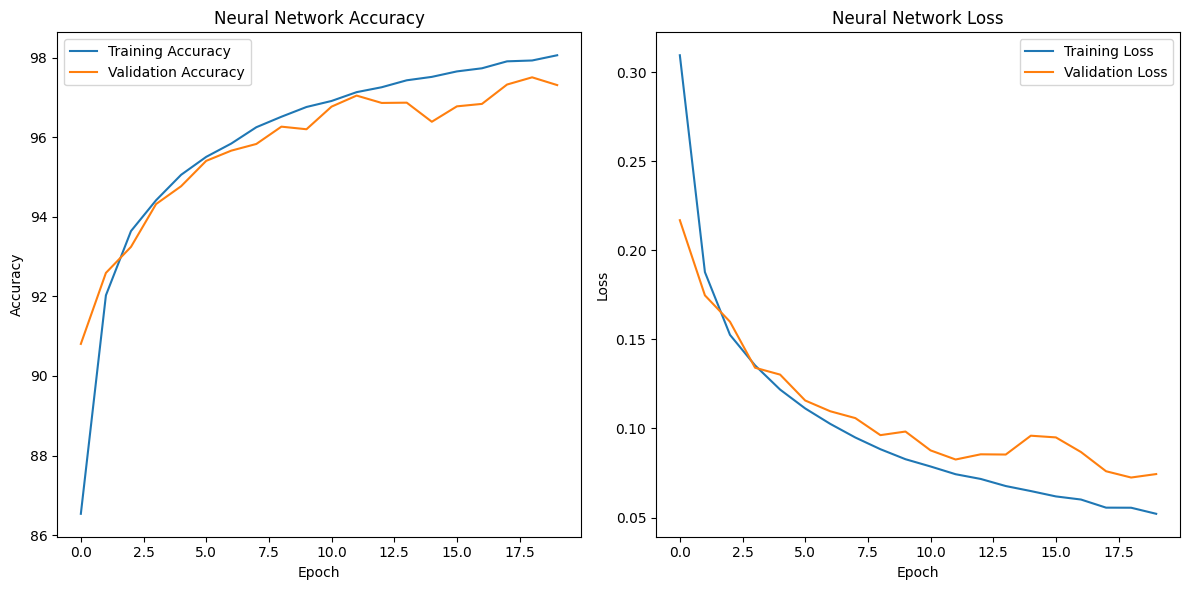

Test Accuracy - Logistic Regression: 0.7613
Test Accuracy - Random Forest: 0.9912
Test Accuracy - Neural Network: 0.9731


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assume dataset_resampled is already loaded
# If not, you should load your dataset here
# dataset_resampled = pd.read_csv('your_dataset.csv')

# Prepare the data
X = dataset_resampled.drop(columns=['ClaimYN']).values
y = dataset_resampled['ClaimYN'].values

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot metrics
def plot_metrics(history, title="Model Metrics"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_acc_log = log_reg.score(X_train, y_train)
val_acc_log = log_reg.score(X_val, y_val)
print(f"Logistic Regression - Training Accuracy: {train_acc_log:.4f}, Validation Accuracy: {val_acc_log:.4f}")

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
train_acc_rf = random_forest.score(X_train, y_train)
val_acc_rf = random_forest.score(X_val, y_val)
print(f"Random Forest - Training Accuracy: {train_acc_rf:.4f}, Validation Accuracy: {val_acc_rf:.4f}")

# Neural Network Model
class NNModel(nn.Module):
    def __init__(self, input_size):
        super(NNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train and evaluate NN model
def train_nn_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_acc, val_acc = [], []
    train_loss, val_loss = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        train_acc.append(100 * correct / total)
        train_loss.append(running_loss / len(train_loader))

        model.eval()
        val_running_loss = 0.0
        correct, total = 0, 0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_acc.append(100 * correct / total)
        val_loss.append(val_running_loss / len(val_loader))

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, '
              f'Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.2f}%')

    return {'train_acc': train_acc, 'val_acc': val_acc, 'train_loss': train_loss, 'val_loss': val_loss}

# Prepare data for PyTorch models
train_data = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
val_data = TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Train NN model
nn_model = NNModel(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)
nn_history = train_nn_model(nn_model, train_loader, val_loader, criterion, optimizer, epochs=20)

plot_metrics(nn_history, title="Neural Network")

# Test Accuracy for each model
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))
test_acc_rf = accuracy_score(y_test, random_forest.predict(X_test))

nn_model.eval()
with torch.no_grad():
    nn_test_outputs = nn_model(torch.FloatTensor(X_test))
    _, nn_test_preds = torch.max(nn_test_outputs.data, 1)
test_acc_nn = accuracy_score(y_test, nn_test_preds.numpy())

# Display test accuracies
print(f"Test Accuracy - Logistic Regression: {test_acc_log:.4f}")
print(f"Test Accuracy - Random Forest: {test_acc_rf:.4f}")
print(f"Test Accuracy - Neural Network: {test_acc_nn:.4f}")

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pytorch_tabnet.tab_model import TabNetClassifier

# Step 1: Load the dataset
dataset = pd.read_csv('/content/drive/My Drive/telematics_syn.csv')

# Step 2: Create the adjusted ClaimYN label
dataset['ClaimYN'] = ((dataset['NB_Claim'] >= 1) & (dataset['AMT_Claim'] > 1000)).astype(int)

# Step 3: Display the distribution of the new labels
label_distribution = dataset['ClaimYN'].value_counts().sort_index()
label_mapping = {0: 'Not Risky', 1: 'Risky'}
print("\nAdjusted Distribution of ClaimYN Labels:")
for label, count in label_distribution.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")

# Step 4: Save the updated dataset with the new labels
dataset.to_csv('telematics_syn_with_Adjusted_ClaimYN.csv', index=False)

# Step 5: Preprocess the dataset
# 1. Handle missing values (if any)
dataset.fillna(method='ffill', inplace=True)

# 2. Encode categorical variables (if any exist)
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# 3. Standardize numerical columns
numerical_columns = dataset.drop(columns=['ClaimYN', 'NB_Claim', 'AMT_Claim']).columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Step 6: Handle the imbalance in the dataset using SMOTE
from imblearn.over_sampling import SMOTE

X = dataset.drop(columns=['ClaimYN'])
y = dataset['ClaimYN']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merging resampled data back into a single DataFrame
dataset_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['ClaimYN'])], axis=1)

# Display the new distribution of ClaimYN after resampling
label_distribution_resampled = dataset_resampled['ClaimYN'].value_counts().sort_index()
print("\nResampled Distribution of ClaimYN Labels:")
for label, count in label_distribution_resampled.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")

# Step 7: Drop NB_Claim and AMT_Claim columns
dataset_resampled = dataset_resampled.drop(columns=['NB_Claim', 'AMT_Claim'])

# Step 8: Split the dataset into training, validation, and test sets
X = dataset_resampled.drop(columns=['ClaimYN'])
y = dataset_resampled['ClaimYN']

# Split the data (70% train, 15% test, 15% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Re-scale the data again after splitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot accuracy and loss
def plot_metrics(history, title="Model Metrics"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

train_acc_log = log_reg.score(X_train, y_train)
val_acc_log = log_reg.score(X_val, y_val)

print(f"Logistic Regression - Training Accuracy: {train_acc_log}, Validation Accuracy: {val_acc_log}")

# Model 2: Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

train_acc_rf = random_forest.score(X_train, y_train)
val_acc_rf = random_forest.score(X_val, y_val)

print(f"Random Forest - Training Accuracy: {train_acc_rf}, Validation Accuracy: {val_acc_rf}")

# Model 3: TabNet
tabnet = TabNetClassifier()
tabnet.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_name=['val'], patience=5, max_epochs=200, batch_size=1024)

train_acc_tabnet = accuracy_score(y_train, tabnet.predict(X_train))
val_acc_tabnet = accuracy_score(y_val, tabnet.predict(X_val))

print(f"TabNet - Training Accuracy: {train_acc_tabnet}, Validation Accuracy: {val_acc_tabnet}")

# Model 4: Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preparing data for PyTorch
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Training CNN
cnn_model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

train_acc_cnn, val_acc_cnn = [], []
train_loss_cnn, val_loss_cnn = [], []

epochs = 20
for epoch in range(epochs):
    cnn_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc_cnn.append(100 * correct / total)
    train_loss_cnn.append(running_loss / len(train_loader))

    cnn_model.eval()
    val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = cnn_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc_cnn.append(100 * correct / total)
    val_loss_cnn.append(val_loss / len(val_loader))

plot_metrics({'train_acc': train_acc_cnn, 'val_acc': val_acc_cnn, 'train_loss': train_loss_cnn, 'val_loss': val_loss_cnn}, title="CNN")

# Model 5: Recurrent Neural Network (RNN)
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(X_train.shape[1], 128, batch_first=True)
        self.fc = nn.Linear(128, 2)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

# Reshaping data for RNN
train_data_rnn = TensorDataset(torch.tensor(X_train.reshape(-1, 1, X_train.shape[1]), dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_data_rnn = TensorDataset(torch.tensor(X_val.reshape(-1, 1, X_val.shape[1]), dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))

train_loader_rnn = DataLoader(train_data_rnn, batch_size=64, shuffle=True)
val_loader_rnn = DataLoader(val_data_rnn, batch_size=64)

# Training RNN
rnn_model = RNNModel()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

train_acc_rnn, val_acc_rnn = [], []
train_loss_rnn, val_loss_rnn = [], []

for epoch in range(epochs):
    rnn_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader_rnn:
        optimizer.zero_grad()
        outputs = rnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc_rnn.append(100 * correct / total)
    train_loss_rnn.append(running_loss / len(train_loader_rnn))

    rnn_model.eval()
    val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader_rnn:
            outputs = rnn_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc_rnn.append(100 * correct / total)
    val_loss_rnn.append(val_loss / len(val_loader_rnn))

plot_metrics({'train_acc': train_acc_rnn, 'val_acc': val_acc_rnn, 'train_loss': train_loss_rnn, 'val_loss': val_loss_rnn}, title="RNN")

# Test Evaluation
print("Test Accuracy:")
print(f"Logistic Regression: {accuracy_score(y_test, log_reg.predict(X_test))}")
print(f"Random Forest: {accuracy_score(y_test, random_forest.predict(X_test))}")
print(f"TabNet: {accuracy_score(y_test, tabnet.predict(X_test))}")
print(f"CNN: {accuracy_score(y_test, cnn_model(torch.tensor(X_test, dtype=torch.float32)).argmax(dim=1))}")
print(f"RNN: {accuracy_score(y_test, rnn_model(torch.tensor(X_test.reshape(-1, 1, X_test.shape[1]), dtype=torch.float32)).argmax(dim=1))}")


Adjusted Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 2698 instances


<ipython-input-4-60802033fae8>:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)



Resampled Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 97302 instances
Logistic Regression - Training Accuracy: 0.7613087460175302, Validation Accuracy: 0.7615018327566716
Random Forest - Training Accuracy: 1.0, Validation Accuracy: 0.9911616594155733


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52095 | val_auc: 0.85857 |  0:00:10s
epoch 1  | loss: 0.45068 | val_auc: 0.89115 |  0:00:20s
epoch 2  | loss: 0.40302 | val_auc: 0.90089 |  0:00:33s
epoch 3  | loss: 0.3945  | val_auc: 0.82391 |  0:00:52s
epoch 4  | loss: 0.37972 | val_auc: 0.90159 |  0:01:01s
epoch 5  | loss: 0.39947 | val_auc: 0.81062 |  0:01:11s
epoch 6  | loss: 0.41194 | val_auc: 0.89934 |  0:01:21s
epoch 7  | loss: 0.39243 | val_auc: 0.84901 |  0:01:30s
epoch 8  | loss: 0.37925 | val_auc: 0.82705 |  0:01:40s
epoch 9  | loss: 0.38363 | val_auc: 0.8235  |  0:01:49s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_val_auc = 0.90159


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet - Training Accuracy: 0.7971032579172234, Validation Accuracy: 0.7990819088075092


ValueError: could not determine the shape of object type 'Series'